In [7]:
import os
import tarfile
import urllib
import seaborn as sns

In [8]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [9]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [10]:
fetch_housing_data()

In [11]:
import pandas as pd

In [12]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [13]:
housing = load_housing_data()

In [14]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [17]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


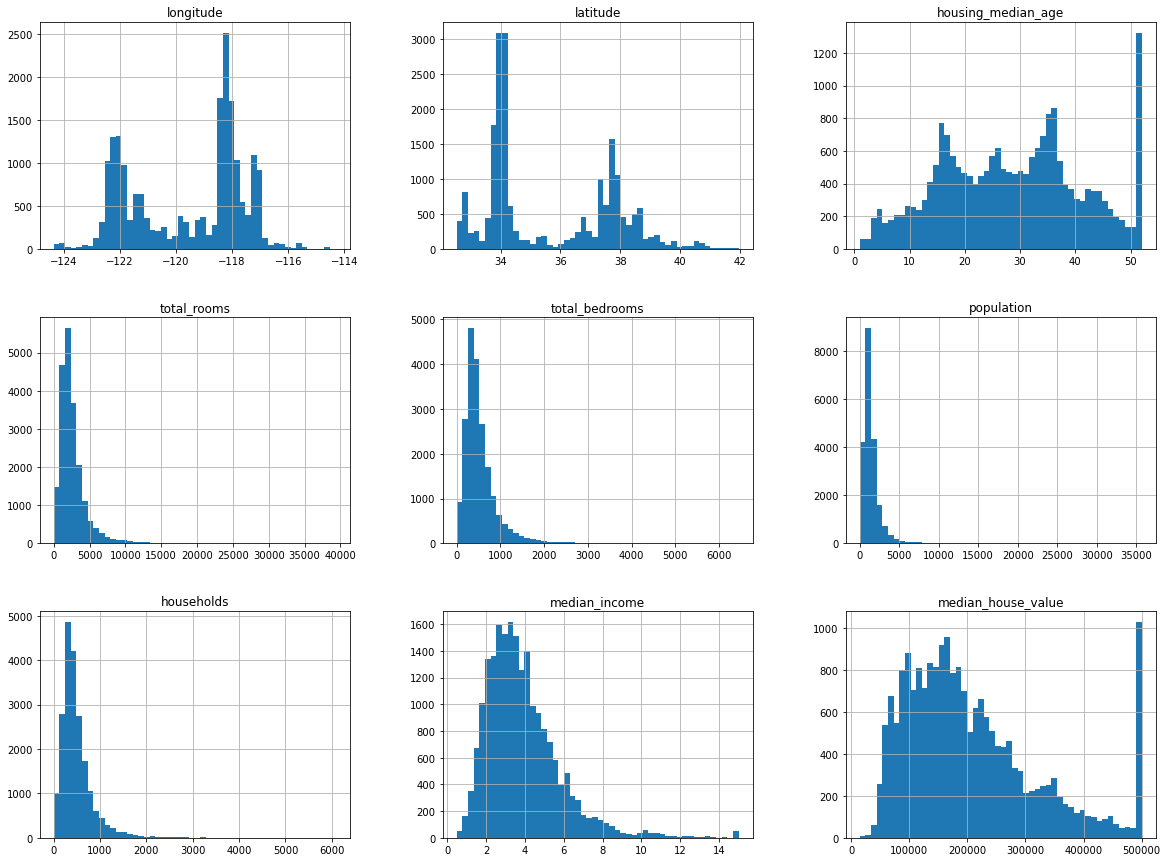

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Creating Test Dataset

In [19]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [20]:
train_set, test_set = split_train_test(housing, 0.2)

In [21]:
len(train_set)

16512

In [22]:
len(test_set)

4128

In [23]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [24]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [25]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [26]:
len(train_set)

16322

In [27]:
len(test_set)

4318

In [28]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<AxesSubplot:>

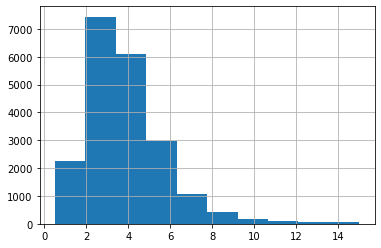

In [29]:
housing.median_income.hist()

In [30]:
housing['income_cat'] = pd.cut(housing.median_income, bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1,2,3,4,5])

<AxesSubplot:>

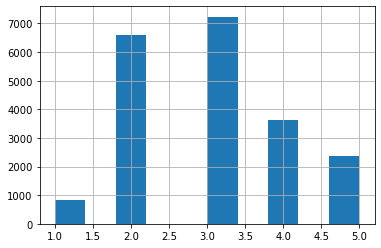

In [31]:
housing.income_cat.hist()

In [32]:
housing.income_cat.value_counts(sort=False)/len(housing)

1    0.039826
2    0.318847
3    0.350581
4    0.176308
5    0.114438
Name: income_cat, dtype: float64

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing.income_cat):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [34]:
strat_test_set.income_cat.value_counts(sort=False)/len(strat_test_set)

1    0.039971
2    0.318798
3    0.350533
4    0.176357
5    0.114341
Name: income_cat, dtype: float64

In [35]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights

In [36]:
housing = strat_train_set.copy()

### Visualizing Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

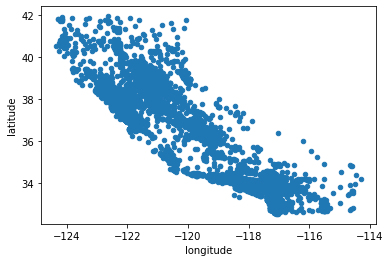

In [37]:
housing.plot(kind='scatter', x='longitude', y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

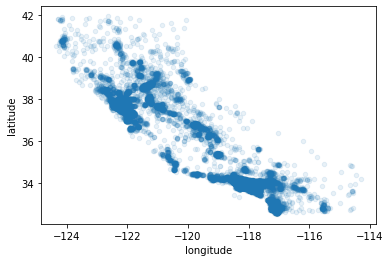

In [38]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha= 0.1)

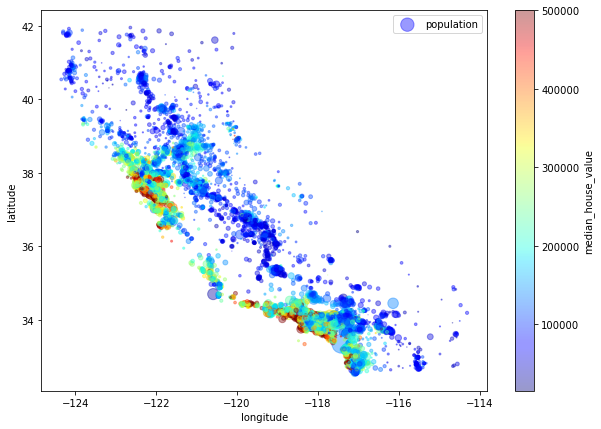

In [39]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

### Looking for Correlation

In [40]:
corr_matrix = housing.corr()

In [41]:
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

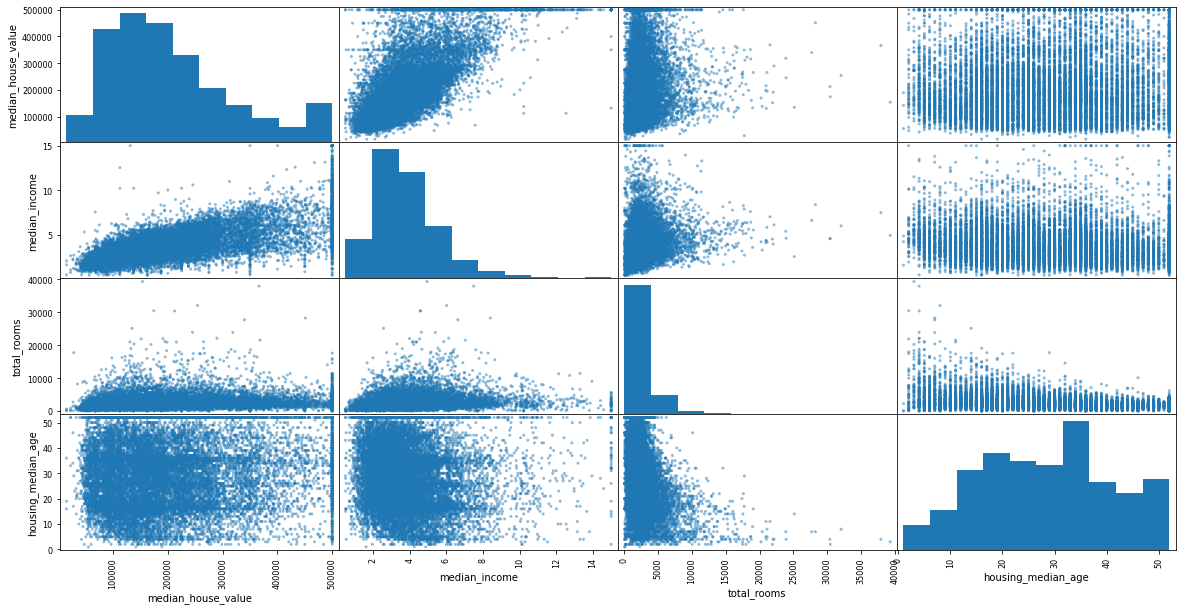

In [42]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(20, 10))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

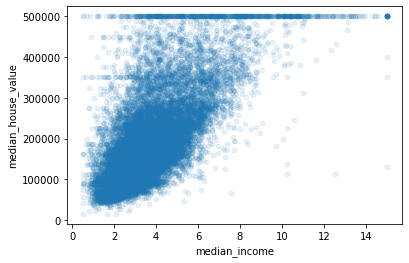

In [43]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

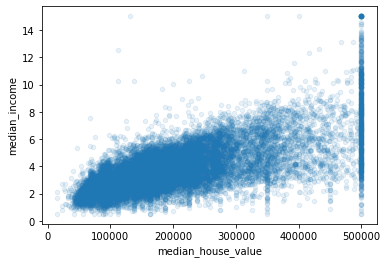

In [44]:
housing.plot(kind="scatter", y="median_income", x="median_house_value",alpha=0.1)

In [45]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [46]:
corr_matrix = housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

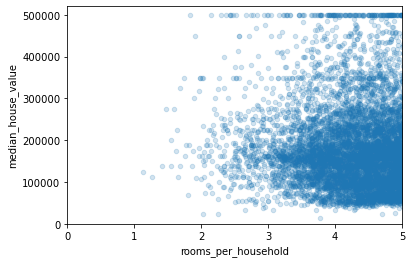

In [47]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [48]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


### Prepare the Data for Machine Learning Algorithms


In [49]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [50]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [51]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [52]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [53]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [54]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [55]:
X = imputer.transform(housing_num)

In [56]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

<AxesSubplot:>

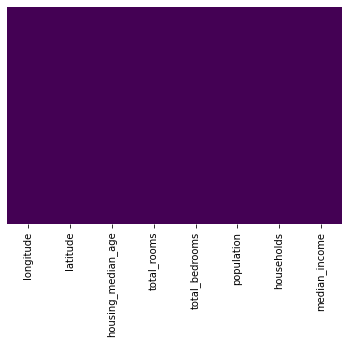

In [57]:
sns.heatmap(housing_tr.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Handling Text and Categorical Attributes

In [58]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [59]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [60]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [61]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [62]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [63]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformers

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [65]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [housing.columns.get_loc(c) for c in col_names]

In [66]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


### Transformation Pipeline

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
    ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [68]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
    ])
housing_prepared = full_pipeline.fit_transform(housing)


In [69]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [70]:
housing_prepared.shape

(16512, 16)

## Select and Train a model

### Training and evaluating on the training set  

In [71]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [72]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [73]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [74]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [75]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49438.66860915801

In [76]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [77]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Better evaluation using cross validation

In [78]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [79]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


In [80]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.328209818065


In [81]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [82]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [83]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


In [84]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69104.079982
std       3036.132517
min      64114.991664
25%      67077.398482
50%      68718.763507
75%      71357.022543
max      73997.080502
dtype: float64

In [85]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111095.06635291968

In [91]:
from tqdm import tqdm
import mlflow 
import mlflow.sklearn
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score,f1_score,recall_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

In [92]:
def eval_metrics(actual, pred):
         rmse = np.sqrt(mean_squared_error(actual, pred))
         mae = mean_absolute_error(actual, pred)
         r2 = r2_score(actual, pred)
         return rmse, mae, r2 

In [93]:
n_estimators_range = [3, 10, 30]
max_features_range = [2, 4, 6, 8]


for n_estimators in tqdm(n_estimators_range):
        for max_features in tqdm(max_features_range, leave=False):

            with mlflow.start_run(experiment_id=0):

                model = RandomForestRegressor(
                    n_estimators=n_estimators,
                    max_features=max_features
                )
                model.fit(housing_prepared, housing_labels)
                y_pred = model.predict(housing_prepared)

                (rmse, mae, r2) = eval_metrics(housing_labels,y_pred)
                print("  RMSE: %s" % rmse)
                print("  MAE: %s" % mae)
                print("  R2: %s" % r2)


                mlflow.log_param("n_estimators", n_estimators)
                mlflow.log_param("max_features", max_features)

                mlflow.sklearn.log_model(forest_reg, "model")
                mlflow.log_metric("rmse", rmse)
                mlflow.log_metric("r2", r2)
                mlflow.log_metric("mae", mae)
               

            
                mlflow.sklearn.log_model(model, "model")

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

  RMSE: 32474.164917567417
  MAE: 18114.527151970287
  R2: 0.9212182126316671



 25%|█████████████████████                                                               | 1/4 [00:07<00:22,  7.59s/it]

  RMSE: 30025.702617356794
  MAE: 16256.238069282948
  R2: 0.9326502165390933



 50%|██████████████████████████████████████████                                          | 2/4 [00:14<00:14,  7.12s/it]

  RMSE: 29757.551488333796
  MAE: 15824.198623223514
  R2: 0.9338478089259425



 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:20<00:06,  6.83s/it]

  RMSE: 29210.8932743017
  MAE: 15900.775355297157
  R2: 0.9362559692557866



  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

  RMSE: 23668.24195319458
  MAE: 15221.97519379845
  R2: 0.9581513120453169



 25%|█████████████████████                                                               | 1/4 [00:08<00:24,  8.14s/it]

  RMSE: 22741.24394006613
  MAE: 14357.330093265504
  R2: 0.9613652345946471



 50%|██████████████████████████████████████████                                          | 2/4 [00:15<00:15,  7.89s/it]

  RMSE: 22184.8906827091
  MAE: 13877.589553052327
  R2: 0.9632324719845586



 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:23<00:07,  7.61s/it]

  RMSE: 21699.23505056464
  MAE: 13549.793101986434
  R2: 0.964824628381982



  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

  RMSE: 20471.02345946034
  MAE: 13734.811270591084
  R2: 0.9686939007410439



 25%|█████████████████████                                                               | 1/4 [00:08<00:24,  8.30s/it]

  RMSE: 19289.30471938351
  MAE: 12659.92143895349
  R2: 0.9722039558013108



 50%|██████████████████████████████████████████                                          | 2/4 [00:16<00:16,  8.29s/it]

  RMSE: 19012.91301953007
  MAE: 12376.34295260013
  R2: 0.9729948142592278



 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:24<00:08,  8.28s/it]

  RMSE: 19094.657620148882
  MAE: 12289.974529635014
  R2: 0.9727621015053269



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:32<00:00, 30.88s/it]


In [95]:
!mlflow ui

^C


In [96]:
with mlflow.start_run():
    mlflow.sklearn.log_model(lin_reg, "model")
    print("  MSE: %s" % lin_mse)
    print("  MAE: %s" % lin_mae)
    mlflow.log_metric("rmse", lin_mse)
    mlflow.log_metric("mae", lin_mae)
    mlflow.log_artifact("housing_prices_scatterplot.png")
    mlflow.log_artifact("scatter_matrix_plot.png")
    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme
    if tracking_url_type_store != "file":

            
            mlflow.sklearn.log_model(lin_reg, "model", registered_model_name="LinearRegressionModel")
    else:
            mlflow.sklearn.log_model(lin_reg, "model")

  MSE: 4709785076.060029
  MAE: 49438.66860915801


FileNotFoundError: [Errno 2] No such file or directory: 'housing_prices_scatterplot.png'

# Fine tuning the model 

## Grid Search

In [90]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [91]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [92]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [93]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63124.29705426615 {'max_features': 2, 'n_estimators': 3}
55972.29839862724 {'max_features': 2, 'n_estimators': 10}
52764.89109824898 {'max_features': 2, 'n_estimators': 30}
60224.836199191166 {'max_features': 4, 'n_estimators': 3}
52623.02902311448 {'max_features': 4, 'n_estimators': 10}
50496.38776871219 {'max_features': 4, 'n_estimators': 30}
59189.82222540873 {'max_features': 6, 'n_estimators': 3}
52423.83053519982 {'max_features': 6, 'n_estimators': 10}
50061.66454904938 {'max_features': 6, 'n_estimators': 30}
59152.97408747873 {'max_features': 8, 'n_estimators': 3}
51704.34932386376 {'max_features': 8, 'n_estimators': 10}
49914.84778541962 {'max_features': 8, 'n_estimators': 30}
61702.21070514513 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53526.816616902506 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59480.56127041123 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52357.0247505752 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [94]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041899,0.003668,0.003143,0.006287,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.924416e+09,-3.993507e+09,...,-3.984677e+09,3.841172e+07,18,-1.059169e+09,-1.106163e+09,-1.124731e+09,-1.125991e+09,-1.004475e+09,-1.084106e+09,4.659242e+07
1,0.142509,0.005508,0.005757,0.003943,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.211607e+09,-3.105557e+09,...,-3.132898e+09,5.572948e+07,11,-6.032885e+08,-5.890669e+08,-5.889503e+08,-5.560544e+08,-5.713385e+08,-5.817397e+08,1.635819e+07
2,0.426328,0.005927,0.021050,0.002911,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.806819e+09,-2.735496e+09,...,-2.784134e+09,6.734790e+07,9,-4.370387e+08,-4.347493e+08,-4.350158e+08,-4.380003e+08,-4.270728e+08,-4.343754e+08,3.849941e+06
3,0.068614,0.004253,0.002070,0.003144,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.764572e+09,-3.241221e+09,...,-3.627031e+09,2.099684e+08,16,-9.545578e+08,-9.351720e+08,-1.019981e+09,-1.018651e+09,-9.555748e+08,-9.767874e+08,3.548030e+07
4,0.234041,0.016090,0.011611,0.005136,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.748838e+09,-2.634573e+09,...,-2.769183e+09,9.623252e+07,8,-5.185261e+08,-5.252638e+08,-5.199240e+08,-5.158754e+08,-4.930246e+08,-5.145228e+08,1.117649e+07
5,0.683721,0.011781,0.018569,0.003326,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.569036e+09,-2.487673e+09,...,-2.549885e+09,3.915463e+07,3,-3.842611e+08,-3.850355e+08,-3.971247e+08,-3.825288e+08,-3.821247e+08,-3.862150e+08,5.559677e+06
6,0.093578,0.000276,0.000000,0.000000,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.368668e+09,-3.567584e+09,...,-3.503435e+09,1.491293e+08,14,-8.915754e+08,-9.453865e+08,-9.626209e+08,-9.462090e+08,-9.255019e+08,-9.342588e+08,2.437046e+07
7,0.309965,0.004094,0.009539,0.001108,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.768873e+09,-2.653793e+09,...,-2.748258e+09,1.225915e+08,7,-5.229956e+08,-5.068602e+08,-5.113593e+08,-4.992889e+08,-5.101776e+08,-5.101363e+08,7.684498e+06
8,0.926198,0.009677,0.020147,0.000809,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.514692e+09,-2.411024e+09,...,-2.506170e+09,7.496384e+07,2,-3.854225e+08,-3.818462e+08,-3.899109e+08,-3.763205e+08,-3.851312e+08,-3.837263e+08,4.505132e+06
9,0.120162,0.003743,0.000447,0.000895,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.489285e+09,-3.457888e+09,...,-3.499074e+09,1.409913e+08,12,-9.345036e+08,-9.145025e+08,-8.759670e+08,-9.560944e+08,-9.375138e+08,-9.237163e+08,2.727624e+07


## Randomized search

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E365F952B0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E365F95A90>},
                   random_state=42, scoring='neg_mean_squared_error')

In [96]:
cvres = rnd_search.cv_results_
for mean_score , params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


## Analyze the best model and their errors

In [97]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.70129283e-02, 6.29300778e-02, 4.25833485e-02, 1.60070625e-02,
       1.43005918e-02, 1.50390438e-02, 1.35752875e-02, 3.66058147e-01,
       5.53269263e-02, 1.14077126e-01, 5.71186029e-02, 1.33176371e-02,
       1.57444390e-01, 1.04303339e-04, 2.42257580e-03, 2.68195095e-03])

In [98]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3660581472218342, 'median_income'),
 (0.15744439048482, 'INLAND'),
 (0.11407712583926811, 'pop_per_hhold'),
 (0.0670129283011975, 'longitude'),
 (0.06293007782825323, 'latitude'),
 (0.05711860285817781, 'bedrooms_per_room'),
 (0.05532692625180573, 'rooms_per_hhold'),
 (0.04258334845739899, 'housing_median_age'),
 (0.01600706249006912, 'total_rooms'),
 (0.015039043778021576, 'population'),
 (0.014300591755415369, 'total_bedrooms'),
 (0.013575287516847471, 'households'),
 (0.013317637134797725, '<1H OCEAN'),
 (0.0026819509453756564, 'NEAR OCEAN'),
 (0.0024225757977666936, 'NEAR BAY'),
 (0.00010430333895088473, 'ISLAND')]

## Evaluate system on the test

In [99]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [101]:
final_rmse

47874.28667921015

In [102]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45892.23267408, 49777.48115638])

In [103]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45892.23267408242, 49777.48115638468)

In [104]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45892.82651606087, 49776.93365860427)

# Exercise 

##### 1. Try a Support Vector Machine regressor (sklearn.svm.SVR) with various hyperparameters, such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don’t worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=10, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   6.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.5s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.6s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.6s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.6s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.6s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.7s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.6s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.5s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.2s
[CV] END ..............................C=30.0,

[CV] END .......................C=1.0, gamma=0.1, kernel=rbf; total time=  10.7s
[CV] END .......................C=1.0, gamma=0.1, kernel=rbf; total time=  10.7s
[CV] END .......................C=1.0, gamma=0.1, kernel=rbf; total time=  10.7s
[CV] END .......................C=1.0, gamma=0.1, kernel=rbf; total time=  10.6s
[CV] END .......................C=1.0, gamma=0.1, kernel=rbf; total time=  10.6s
[CV] END .......................C=1.0, gamma=0.1, kernel=rbf; total time=  10.5s
[CV] END .......................C=1.0, gamma=0.1, kernel=rbf; total time=  10.7s
[CV] END .......................C=1.0, gamma=0.1, kernel=rbf; total time=  10.6s
[CV] END .......................C=1.0, gamma=0.1, kernel=rbf; total time=  10.6s
[CV] END .......................C=1.0, gamma=0.3, kernel=rbf; total time=  10.3s
[CV] END .......................C=1.0, gamma=0.3, kernel=rbf; total time=  10.4s
[CV] END .......................C=1.0, gamma=0.3, kernel=rbf; total time=  10.6s
[CV] END ...................

[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  10.9s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  10.8s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  10.9s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  10.8s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  10.9s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  10.9s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  11.0s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  10.8s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  10.8s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  10.8s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  10.9s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  10.8s
[CV] END ...................

[CV] END ......................C=30.0, gamma=1.0, kernel=rbf; total time=  10.2s
[CV] END ......................C=30.0, gamma=1.0, kernel=rbf; total time=  10.2s
[CV] END ......................C=30.0, gamma=1.0, kernel=rbf; total time=  10.2s
[CV] END ......................C=30.0, gamma=1.0, kernel=rbf; total time=  10.2s
[CV] END ......................C=30.0, gamma=1.0, kernel=rbf; total time=  10.3s
[CV] END ......................C=30.0, gamma=3.0, kernel=rbf; total time=  10.8s
[CV] END ......................C=30.0, gamma=3.0, kernel=rbf; total time=  10.9s
[CV] END ......................C=30.0, gamma=3.0, kernel=rbf; total time=  10.8s
[CV] END ......................C=30.0, gamma=3.0, kernel=rbf; total time=  10.9s
[CV] END ......................C=30.0, gamma=3.0, kernel=rbf; total time=  10.8s
[CV] END ......................C=30.0, gamma=3.0, kernel=rbf; total time=  10.9s
[CV] END ......................C=30.0, gamma=3.0, kernel=rbf; total time=  10.8s
[CV] END ...................

[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=  10.4s
[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=  10.4s
[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=  10.4s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  10.2s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  10.4s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  10.3s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  10.3s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  10.3s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  10.2s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  10.3s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  10.2s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  10.3s
[CV] END ...................

GridSearchCV(cv=10, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [107]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70341.0410121459

In [109]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

##### 2. Try replacing GridSearchCV with RandomizedSearchCV.

In [110]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }
svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.5s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.4s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.8s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.6s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.5s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.8s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  11.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  11.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  11.3s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  11.3s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   9.9s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=  10.0s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   9.8s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   5.9s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   5.7s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   5.7s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   5.8s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   5.8s
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.7min
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.6min
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.7min
[CV] END C=151136.2028

[CV] END C=60.17373642891687, gamma=1.2491263443165994, kernel=linear; total time=   5.8s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   9.9s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   9.9s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=  10.0s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   9.9s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   9.9s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   6.1s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   6.1s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   6.0s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   6.0s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   6.1s
[CV] END C=55.538389

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E363ECD9A0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E36459F280>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [111]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54751.69009256623

In [112]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

##### 3. Try adding a transformer in the preparation pipeline to select only the most important attributes. 

In [113]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [114]:
k=5

In [115]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12], dtype=int64)

In [116]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

In [117]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.3660581472218342, 'median_income'),
 (0.15744439048482, 'INLAND'),
 (0.11407712583926811, 'pop_per_hhold'),
 (0.0670129283011975, 'longitude'),
 (0.06293007782825323, 'latitude')]

In [118]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [119]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [120]:
housing_prepared_top_k_features[0:3]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

In [121]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

##### 4. Try creating a single pipeline that does the full data preparation plus the final prediction.

In [122]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [123]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                    

In [124]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 83384.49158095 299407.90439234  92272.03345144 150173.16199041]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]


##### 5. Automatically explore some preparation options using GridSearchCV.


In [125]:
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   6.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   9.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   9.8s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   9.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  10.0s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   7.2s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   9.8s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   9.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   9.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  10.0s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   7.1s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=  10.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   9.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=  10.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=  10.0s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   7.1s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  10.2s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  10.1s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  10.2s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  10.2s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   7.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  10.1s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   9.9s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  10.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  10.0s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   7.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  10.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  10.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  10.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  10.1s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   7.0s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=  10.1s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   9.9s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=  10.1s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=  10.0s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   7.0s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  10.1s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  10.2s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  10.2s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  10.3s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   7.2s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  10.3s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  10.3s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  10.2s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  10.1s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   7.8s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  10.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  10.7s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  10.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  10.5s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   7.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  10.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  10.5s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  10.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  10.7s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   7.7s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  10.7s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  11.1s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  10.7s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  10.8s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   7.8s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  11.0s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  10.7s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  10.7s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  10.9s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   7.6s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  10.9s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  10.6s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  10.5s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  10.9s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   7.5s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  10.9s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  10.7s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  10.6s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  10.7s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   7.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  10.7s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  10.8s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  11.0s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  10.9s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   7.8s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  10.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  11.1s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  10.8s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  10.9s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   7.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  10.8s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  10.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  10.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  11.0s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   7.9s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  11.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  11.4s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  11.0s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  11.5s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   8.1s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  11.4s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  11.4s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  11.3s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  11.1s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   8.0s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  11.1s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  11.2s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  11.1s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  11.2s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  10.2s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  12.3s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  12.3s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  12.4s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  12.2s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   9.5s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  12.2s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  12.5s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  12.9s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  13.1s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   9.1s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  12.8s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  12.3s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  13.9s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  13.1s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  13.3s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  16.8s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  14.6s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  15.6s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  16.3s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  10.9s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  15.8s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  14.6s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  15.2s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  16.3s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  11.7s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  15.5s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  16.2s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  14.4s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  13.9s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  13.1s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  17.5s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  15.3s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  17.0s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  16.1s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  14.2s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  16.8s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  15.8s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  17.5s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  15.8s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  15.0s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  17.2s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  17.2s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  17.7s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  18.4s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  13.6s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  18.9s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  17.9s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  19.2s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  17.5s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  13.3s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  17.4s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  16.6s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  19.7s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  17.8s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  16.1s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  17.8s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  18.8s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  18.7s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  19.0s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  14.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  19.9s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  19.9s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  19.2s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  17.9s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  16.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  19.3s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  17.3s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  16.6s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  19.7s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  17.5s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  18.7s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  20.8s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  17.7s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  20.0s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  17.5s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  19.7s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  21.2s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  21.5s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  18.2s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  17.6s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  21.3s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  18.0s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  21.8s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  22.1s


C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  18.7s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  18.7s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  21.1s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  19.3s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  18.6s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=   0.0s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  19.5s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  21.2s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  20.5s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  22.2s
[CV] 

C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\anubhav.yadav\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
       

In [126]:
grid_search_prep.best_params_

{'feature_selection__k': 1, 'preparation__num__imputer__strategy': 'mean'}